In [17]:
!pip install -q git+https://www.github.com/keras-team/keras-contrib.git

mxnet 1.3.0.post0 has requirement numpy<1.15.0,>=1.8.2, but you'll have numpy 1.15.2 which is incompatible.
kmeans-smote 0.1.0 has requirement imbalanced-learn<0.4,>=0.3.1, but you'll have imbalanced-learn 0.5.0.dev0 which is incompatible.
kmeans-smote 0.1.0 has requirement numpy<1.15,>=1.13, but you'll have numpy 1.15.2 which is incompatible.
fastai 0.7.0 has requirement torch<0.4, but you'll have torch 0.4.1.post2 which is incompatible.
anaconda-client 1.7.2 has requirement python-dateutil>=2.6.1, but you'll have python-dateutil 2.6.0 which is incompatible.
imbalanced-learn 0.5.0.dev0 has requirement scikit-learn>=0.20, but you'll have scikit-learn 0.19.1 which is incompatible.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [18]:
from keras_contrib.callbacks.cyclical_learning_rate import CyclicLR

In [19]:
import keras
import numpy as np
from functools import reduce
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D,SeparableConvolution2D
from keras.utils import np_utils
from keras import backend
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.datasets import mnist


In [20]:
def plot_hist(history):
    line1,=plt.plot(history.history['val_acc'],label='val_acc')
    line2,=plt.plot(history.history['acc'],label='train_acc')
    plt.legend(handles=[line1, line2])
def plot_history(history):
    nhist={}
    for k,v in history.items():
        nhist[k]=merge_nl(history[k])
    history=nhist
    line1,=plt.plot(history['train'],label='train_acc')
    line2,=plt.plot(history['val'],label='val_acc')    
    plt.legend(handles=[line1, line2])
def mf(o,s):
    if o is None:
        o=[]
    o+=s
    return o
def merge_nl(l):
    return reduce(mf,l,[])

def model_train():
    global hist,epochs,batch_size,X_train,Y_train,X_test,Y_test,augment
    clr= clr = CyclicLR(base_lr=0.001, max_lr=0.006,step_size=2000)
    if augment:
        h=model.fit_generator(datagen.flow(X_train, Y_train, batch_size=32),steps_per_epoch=len(x_train) / 32,verbose=1, epochs=epochs,validation_data=(X_test,Y_test))
    else:
        h=model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1,validation_data=(X_test,Y_test))
    
    hist['train'].append(h.history['acc'])
    hist['val'].append(h.history['val_acc'])

In [21]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [22]:
# print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
# plt.imshow(X_train[0])

X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
x_train = X_train.astype('float32')
X_test = X_test.astype('float32')


divider=255
X_train=X_train/divider
X_test=X_test/divider
y_train[:10]
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

# datagen = ImageDataGenerator(
#     featurewise_center=True,
#     featurewise_std_normalization=True,
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     horizontal_flip=True)

# datagen.fit(X_train)

In [23]:
print("==============================HYPER PARAMETERS BEGIN===================================")

==============================HYPER PARAMETERS BEGIN===================================


In [24]:
dropout=0.1
augment=False

hist={'train':[],'val':[]} #store history

maxpool=False
maxpools=2

sep_conv=True
sep_conv_last=True

kernels=[]
convolutions=[]
model_num=0

model_dict={
    0:{'kernels':[5,10,20,30,40,25,25,20,20],               'convolutions':[3,3,3,3,3,1,3,1,3],'last_conv_size':14},
    1:{'kernels':[5,10,20,30,40,33,33,25,25,20,20],         'convolutions':[3,3,3,3,3,1,3,1,3,1,3],'last_conv_size':12},
    2:{'kernels':[5, 5,10,10,20,20,30,30,40,40,25,25,20,20],'convolutions':[1,3,1,3,1,3,1,3,1,3,1,3,1,3],'last_conv_size':14},
}
# kernels=[5,5,10,10,20,20,30,30, 40, 40,25,25,20,20]
# convolutions=[1,3,1,3,1,3,1,3, 1,3, 1, 3, 1, 3]
# kernels=[5,10,20,30,40,33,33,25,25,20,20]
# convolutions=[3,3,3,3, 1,3, 1, 3, 1, 3]
# kernels=[5,10,20,30,  40,25,25,20,20]
# convolutions=[3,3,3,3, 3, 1, 3, 1, 3]

maxpool_indices={}
# last_conv_size=14
last_conv_kernels=10

In [25]:
print("==============================HYPER PARAMETERS END===================================")

==============================HYPER PARAMETERS END===================================


In [26]:
from keras.layers import Activation

kernels,convolutions,last_conv_size=model_dict[model_num].values()
if maxpool:
    maxpool_indices={4:True,6:True}
    last_conv_size=int(last_conv_size/(2**maxpools))
#len(kernels)%(maxpools+1)==0
model = Sequential()
model.add(BatchNormalization(input_shape=(28,28,1)))
for i in range(len(kernels)):
    model.add(BatchNormalization())
    if sep_conv:
        model.add(SeparableConvolution2D(kernels[i],(convolutions[i],1)))
        model.add(SeparableConvolution2D(kernels[i],(1,convolutions[i])))
        model.add(Activation('relu'))
    else:
        model.add(Convolution2D(kernels[i], convolutions[i],activation='relu'))
        
    if maxpool and maxpool_indices.get(i):
        model.add(MaxPooling2D(pool_size=(2,2)))
    if dropout>0:
        model.add(Dropout(dropout))
    
        
model.add(BatchNormalization())
if sep_conv_last:
    model.add(SeparableConvolution2D(last_conv_kernels,(last_conv_size,1)))
    model.add(SeparableConvolution2D(last_conv_kernels,(1,last_conv_size)))
    model.add(Activation('relu'))
else:
    model.add(Convolution2D(last_conv_kernels, last_conv_size,activation='relu'))
    
model.add(Flatten())
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_12 (Batc (None, 28, 28, 1)         4         
_________________________________________________________________
batch_normalization_13 (Batc (None, 28, 28, 1)         4         
_________________________________________________________________
separable_conv2d_21 (Separab (None, 26, 28, 5)         13        
_________________________________________________________________
separable_conv2d_22 (Separab (None, 26, 26, 5)         45        
_________________________________________________________________
activation_12 (Activation)   (None, 26, 26, 5)         0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 26, 26, 5)         0         
_________________________________________________________________
batch_normalization_14 (Batc (None, 26, 26, 5)         20        
__________

In [27]:
augment=False
batch_size,epochs=(32,5) #7 epochs neeede, 1 extra just in case
model_train()

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 104s 2ms/step - loss: 0.3772 - acc: 0.8794 - val_loss: 0.0993 - val_acc: 0.9693
Epoch 2/5
60000/60000 [==============================] - 100s 2ms/step - loss: 0.1157 - acc: 0.9643 - val_loss: 0.0805 - val_acc: 0.9742
Epoch 3/5
60000/60000 [==============================] - 100s 2ms/step - loss: 0.0921 - acc: 0.9718 - val_loss: 0.0709 - val_acc: 0.9778
Epoch 4/5
60000/60000 [==============================] - 100s 2ms/step - loss: 0.0805 - acc: 0.9749 - val_loss: 0.0510 - val_acc: 0.9830
Epoch 5/5
60000/60000 [==============================] - 100s 2ms/step - loss: 0.0723 - acc: 0.9773 - val_loss: 0.0891 - val_acc: 0.9725


In [28]:
batch_size,epochs=(64,5)
model_train()

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 69s 1ms/step - loss: 0.0571 - acc: 0.9814 - val_loss: 0.0412 - val_acc: 0.9879
Epoch 2/5
60000/60000 [==============================] - 69s 1ms/step - loss: 0.0538 - acc: 0.9829 - val_loss: 0.0401 - val_acc: 0.9864
Epoch 3/5
60000/60000 [==============================] - 69s 1ms/step - loss: 0.0537 - acc: 0.9832 - val_loss: 0.0338 - val_acc: 0.9892
Epoch 4/5
60000/60000 [==============================] - 69s 1ms/step - loss: 0.0523 - acc: 0.9835 - val_loss: 0.0379 - val_acc: 0.9883
Epoch 5/5
60000/60000 [==============================] - 69s 1ms/step - loss: 0.0512 - acc: 0.9839 - val_loss: 0.0436 - val_acc: 0.9852


In [29]:
batch_size,epochs=(128,5) 
model_train()

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 55s 920us/step - loss: 0.0409 - acc: 0.9871 - val_loss: 0.0295 - val_acc: 0.9903
Epoch 2/5
60000/60000 [==============================] - 55s 920us/step - loss: 0.0412 - acc: 0.9869 - val_loss: 0.0323 - val_acc: 0.9905
Epoch 3/5
60000/60000 [==============================] - 55s 921us/step - loss: 0.0388 - acc: 0.9875 - val_loss: 0.0314 - val_acc: 0.9899
Epoch 4/5
60000/60000 [==============================] - 55s 919us/step - loss: 0.0412 - acc: 0.9869 - val_loss: 0.0287 - val_acc: 0.9917
Epoch 5/5
60000/60000 [==============================] - 55s 921us/step - loss: 0.0392 - acc: 0.9879 - val_loss: 0.0306 - val_acc: 0.9895


In [30]:
batch_size,epochs=(256,5)
model_train()

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 48s 805us/step - loss: 0.0341 - acc: 0.9894 - val_loss: 0.0226 - val_acc: 0.9926
Epoch 2/5
60000/60000 [==============================] - 48s 805us/step - loss: 0.0338 - acc: 0.9890 - val_loss: 0.0248 - val_acc: 0.9927
Epoch 3/5
60000/60000 [==============================] - 48s 805us/step - loss: 0.0326 - acc: 0.9892 - val_loss: 0.0270 - val_acc: 0.9916
Epoch 4/5
60000/60000 [==============================] - 48s 805us/step - loss: 0.0318 - acc: 0.9895 - val_loss: 0.0236 - val_acc: 0.9931
Epoch 5/5
60000/60000 [==============================] - 48s 804us/step - loss: 0.0325 - acc: 0.9894 - val_loss: 0.0275 - val_acc: 0.9910


In [31]:
batch_size,epochs=(512,5)
model_train()

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 45s 742us/step - loss: 0.0313 - acc: 0.9901 - val_loss: 0.0223 - val_acc: 0.9934
Epoch 2/5
60000/60000 [==============================] - 45s 742us/step - loss: 0.0289 - acc: 0.9910 - val_loss: 0.0213 - val_acc: 0.9932
Epoch 3/5
60000/60000 [==============================] - 45s 742us/step - loss: 0.0294 - acc: 0.9908 - val_loss: 0.0230 - val_acc: 0.9928
Epoch 4/5
60000/60000 [==============================] - 45s 743us/step - loss: 0.0291 - acc: 0.9905 - val_loss: 0.0222 - val_acc: 0.9931
Epoch 5/5
60000/60000 [==============================] - 45s 743us/step - loss: 0.0286 - acc: 0.9906 - val_loss: 0.0228 - val_acc: 0.9933


[0.022849948052992113, 0.9933]


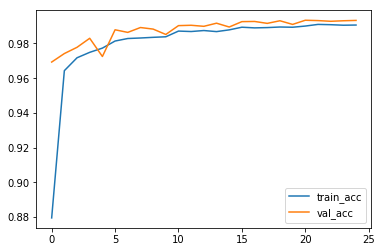

In [32]:
plot_history(hist)
score = model.evaluate(X_test, Y_test, verbose=0)
print(score) # 9887, 9861, 9791

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_dict = dict([(layer.name, layer) for layer in model.layers])
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))


In [ ]:
# layers = [layer.name for layer in model.layers]
# print(layers)

In [ ]:
# vis_img_in_filter(layer_name='conv2d_11')

In [ ]:
# vis_img_in_filter(layer_name='conv2d_15')